<a href="https://colab.research.google.com/github/Amey4509/Data-Science-Assignment/blob/main/Assignment_No_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.6 MB/s eta 0:00:00


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense
import keras_tuner as kf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import seaborn as sns

In [10]:
df=pd.read_csv('/content/forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [11]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [14]:
df.drop(columns=['month','day'],inplace=True)

In [15]:
df['size_category'].unique()

array(['small', 'large'], dtype=object)

<Axes: ylabel='count'>

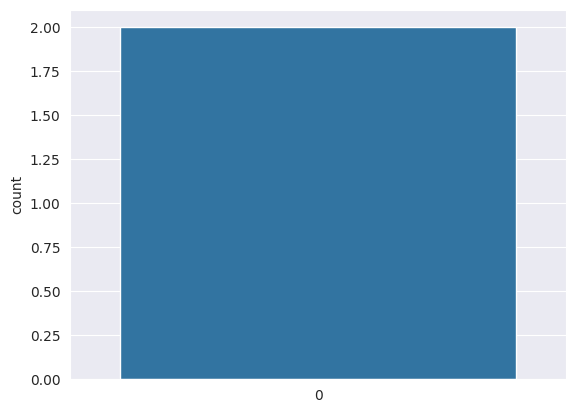

In [17]:
sns.countplot(df['size_category'].value_counts())

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()
y=le.fit_transform(df['size_category'])

In [20]:
x=df.iloc[:,:-1]

In [21]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75,random_state=2)

In [27]:
early=EarlyStopping(monitor='val_loss',mode='min',patience=20)

In [28]:
ann=Sequential()

ann.add(Dense(units=10,activation='relu'))

ann.add(Dense(units=1,activation='sigmoid'))

ann.compile(optimizer='adam',loss='binary_crossentropy')

ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=350,callbacks=[early])


Epoch 1/350
13/13 [==============================] - 2s 39ms/step - loss: 1.0082 - val_loss: 0.9699
Epoch 2/350
13/13 [==============================] - 0s 10ms/step - loss: 0.9396 - val_loss: 0.9245
Epoch 3/350
13/13 [==============================] - 0s 12ms/step - loss: 0.8852 - val_loss: 0.8831
Epoch 4/350
13/13 [==============================] - 0s 11ms/step - loss: 0.8393 - val_loss: 0.8492
Epoch 5/350
13/13 [==============================] - 0s 11ms/step - loss: 0.7996 - val_loss: 0.8221
Epoch 6/350
13/13 [==============================] - 0s 10ms/step - loss: 0.7697 - val_loss: 0.8009
Epoch 7/350
13/13 [==============================] - 0s 9ms/step - loss: 0.7431 - val_loss: 0.7810
Epoch 8/350
13/13 [==============================] - 0s 11ms/step - loss: 0.7212 - val_loss: 0.7645
Epoch 9/350
13/13 [==============================] - 0s 11ms/step - loss: 0.7021 - val_loss: 0.7503
Epoch 10/350
13/13 [==============================] - 0s 11ms/step - loss: 0.6858 - val_loss: 0.7396


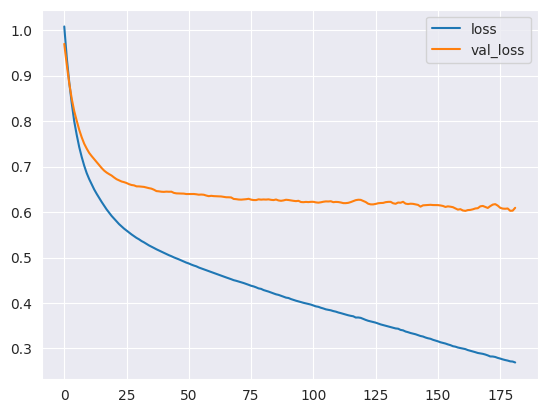

In [30]:
loss = pd.DataFrame(ann.history.history)
loss.plot();

In [31]:
ypred=ann.predict(xtest)

5/5 [==============================] - 0s 8ms/step


In [35]:
ypred=ypred>0.5


In [36]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.77      0.47      0.59        36
           1       0.82      0.95      0.88        94

    accuracy                           0.82       130
   macro avg       0.80      0.71      0.73       130
weighted avg       0.81      0.82      0.80       130



In [37]:
def hyper(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers', min_value = 1,max_value=10)):
        if counter ==0:
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                            activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid']),
                            input_dim = 28))
    else:
        model.add(Dense(
              hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
              activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid'])))
    counter+=1
    model.add(Dense(units = 1,activation='sigmoid'))
    model.compile(optimizer = hp.Choice('optimizer',values = ['adam','rmsprop','sgd']),
                loss = 'binary_crossentropy',metrics = 'accuracy')
    return model


In [38]:
tunner=kf.RandomSearch(hyper,objective='val_accuracy',max_trials=3)

In [39]:
tunner.search(xtrain,ytrain,epochs=5,validation_data=(xtest,ytest))

Trial 3 Complete [00h 00m 04s]
val_accuracy: 0.7230769395828247

Best val_accuracy So Far: 0.7230769395828247
Total elapsed time: 00h 00m 12s


In [40]:
tunner.get_best_hyperparameters()[0].values

{'num_layers': 8,
 'units0': 8,
 'activation0': 'sigmoid',
 'optimizer': 'sgd',
 'units1': 104,
 'activation1': 'relu',
 'units2': 96,
 'activation2': 'tanh',
 'units3': 88,
 'activation3': 'tanh',
 'units4': 8,
 'activation4': 'relu',
 'units5': 8,
 'activation5': 'relu',
 'units6': 8,
 'activation6': 'relu',
 'units7': 8,
 'activation7': 'relu'}

In [41]:
x.shape

(517, 28)

In [42]:
model = tunner.get_best_models(num_models=1)[0]
model.build(x.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 232       
                                                                 
 dense_1 (Dense)             (None, 104)               936       
                                                                 
 dense_2 (Dense)             (None, 96)                10080     
                                                                 
 dense_3 (Dense)             (None, 88)                8536      
                                                                 
 dense_4 (Dense)             (None, 8)                 712       
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 8)                 7

In [43]:
model.fit(xtrain,ytrain,epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 0.6699 - accuracy: 0.7339
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6570 - accuracy: 0.7339
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.7339
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6404 - accuracy: 0.7339
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.7339
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6262 - accuracy: 0.7339
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6211 - accuracy: 0.7339
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6147 - accuracy: 0.7339
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6099 - accuracy: 0.7339
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.7339
Epoch 11/

In [44]:
model.evaluate(xtest,ytest)

5/5 [==============================] - 0s 4ms/step - loss: 0.5926 - accuracy: 0.7231


[0.5925500392913818, 0.7230769395828247]

In [45]:
ypred=model.predict(xtest)
ypred

5/5 [==============================] - 0s 5ms/step


array([[0.7393539 ],
       [0.7449275 ],
       [0.7304704 ],
       [0.742676  ],
       [0.7411165 ],
       [0.7291881 ],
       [0.7451259 ],
       [0.72547245],
       [0.7403562 ],
       [0.7322964 ],
       [0.7451742 ],
       [0.72712284],
       [0.7332331 ],
       [0.74426174],
       [0.73931843],
       [0.71795464],
       [0.73851526],
       [0.7318561 ],
       [0.75112075],
       [0.7313158 ],
       [0.74466336],
       [0.72386605],
       [0.73675895],
       [0.74095976],
       [0.7251895 ],
       [0.7473263 ],
       [0.7318933 ],
       [0.7253325 ],
       [0.748897  ],
       [0.741993  ],
       [0.74407864],
       [0.7446426 ],
       [0.7399294 ],
       [0.7364659 ],
       [0.73337466],
       [0.7427251 ],
       [0.7419671 ],
       [0.7518845 ],
       [0.74309915],
       [0.74693197],
       [0.733291  ],
       [0.74447346],
       [0.73624295],
       [0.7406384 ],
       [0.7236223 ],
       [0.7380062 ],
       [0.7369329 ],
       [0.743

In [46]:
ypred=ypred>0.5
ypred=pd.DataFrame(ypred)

In [47]:
ypred=ypred.replace({True:'Small',False:'Large'})
ypred

,0
0,Small
1,Small
2,Small
3,Small
4,Small
...,...
125,Small
126,Small
127,Small
128,Small


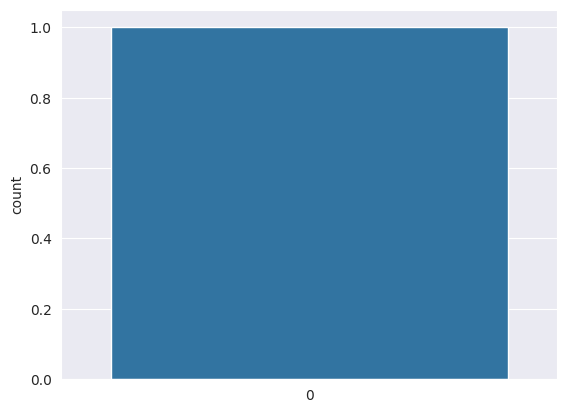

In [48]:
sns.countplot(ypred.value_counts());